# Data Cleaning & Exploratory Data Analysis (EDA) - Purchase

This notebook aims to perform Data Cleaning and EDA on the Flipkart purchase data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/BT4211 Data-driven Marketing")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [ ]:
# Load dataset
purchase_df = pd.read_csv('Data/purchase_data.csv', index_col=0)
purchase_df = purchase_df.drop(purchase_df.columns[0:1], axis=1)
purchase_df['Order Date'] = pd.to_datetime(purchase_df['Order Date'])

In [ ]:
purchase_df.shape

(3179, 18)

In [ ]:
purchase_df.head()

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid
0,OD103719706054443200,G3M1R1,2015-08-23,Delhi,New Delhi,Home & Kitchen,Kitchen Appliances,4.1,1,1370.33,1545.0,18%,Tier_1,0,13,Nova,No,No
1,OD106420064045076000,G3M1R1,2016-07-01,Delhi,New Delhi,Health & Personal Care Appliances,Health Care,4.3,1,1164.76,1260.0,5%,Tier_1,0,9,Omron,No,No
2,OD106420064045076001,G3M1R1,2016-07-01,Delhi,New Delhi,Clothing and Accessories,Books,4.5,1,596.67,730.0,5%,Tier_1,0,23,Johnson,No,No
3,OD109711988579254000,G3M1R2,2017-07-17,Delhi,New Delhi,Exercise & Fitness,Fitness Accessories,4.3,1,199.00,199.0,18%,Tier_1,0,0,HAANS,No,No
4,OD109711988579254000,G3M1R2,2017-07-18,Delhi,New Delhi,Health Care,Health Supplements,4.1,1,4162.00,4162.0,28%,Tier_1,0,0,Muscletech,No,No


In [ ]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     3179 non-null   object        
 1   Name           3179 non-null   object        
 2   Order Date     3179 non-null   datetime64[ns]
 3   State          3179 non-null   object        
 4   City           3179 non-null   object        
 5   Categories     3179 non-null   object        
 6   Subcategories  3179 non-null   object        
 7   Ratings        3179 non-null   float64       
 8   Quantity       3179 non-null   int64         
 9   MRP            3179 non-null   float64       
 10  Final Price    3179 non-null   float64       
 11  GST%%          3179 non-null   object        
 12  City_Tier      3179 non-null   object        
 13  Discount%      3179 non-null   int64         
 14  Delivery Fee%  3179 non-null   int64         
 15  Brand          3161 n

# Data Cleaning

## Drop duplicated rows

In [ ]:
purchase_df.duplicated().sum()

13

In [ ]:
purchase_df.drop_duplicates(inplace=True)

In [ ]:
purchase_df.shape

(3166, 18)

## Check for null values

In [ ]:
purchase_df.isna().sum()

Invoice ID        0
Name              0
Order Date        0
State             0
City              0
Categories        0
Subcategories     0
Ratings           0
Quantity          0
MRP               0
Final Price       0
GST%%             0
City_Tier         0
Discount%         0
Delivery Fee%     0
Brand            18
Sale              0
Covid             0
dtype: int64

In [ ]:
null_brand_purchase_df = purchase_df[purchase_df['Brand'].isna()]
null_brand_purchase_df.head()

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid
420,FAG0R42100000093,G3M4R1,2021-02-18,Andhra Pradesh,Nellore,Computers,Gaming,4.3,1,179.0,179.0,18%,Tier_2,0,0,NaN,Yes,No
454,FAAD5K3976012244,G3M4R2,2020-04-21,Goa,South Goa,Computers,Laptop Accessories,4.2,1,310.0,310.0,5%,Tier 3,0,0,NaN,No,1st Wave
464,FAB2Y72100018466,G3M4R4,2020-06-23,Karnataka,Bengaluru,Books,Books,4.4,1,501.0,451.0,0%,Tier_1,10,0,NaN,No,1st Wave
503,FABQ2X2000115297,G3M4R9,2020-03-11,Karnataka,Bengaluru,Health Care,Health Supplements,4.2,1,1104.0,1104.0,18%,Tier_1,0,0,NaN,Yes,No
835,OD114580344804554000,G5M1R7,2019-12-11,Maharashtra,Nagpur,Clothing and Accessories,Topwear,3.7,1,479.0,519.0,0%,Tier_2,0,9,NaN,No,No


## Tackling Mismatched Invoice ID and Other Variables

In [ ]:
# Get unique Invoice IDs
unique_invoice_ids = list(purchase_df['Invoice ID'].unique())
len(unique_invoice_ids)

2759

In [ ]:
def get_mismatched_invoice_ids(col_name):
  mismatch_invoice_ids = []

  global purchase_df, unique_invoice_ids

  for invoice_id in unique_invoice_ids:
    rows = purchase_df[purchase_df['Invoice ID']==invoice_id].drop_duplicates(subset=['Invoice ID', col_name])
    if rows.shape[0] > 1:
      mismatch_invoice_ids.append(invoice_id)

  return mismatch_invoice_ids

### Option 1: Drop all mismatched rows (selected)

In [ ]:
mismatch_name_invoice_ids = get_mismatched_invoice_ids('Name')
mismatch_date_invoice_ids = get_mismatched_invoice_ids('Order Date')
mismatch_state_invoice_ids = get_mismatched_invoice_ids('State')
mismatch_city_invoice_ids = get_mismatched_invoice_ids('City')

In [ ]:
mismatch_invoice_id = list(set(mismatch_name_invoice_ids + mismatch_date_invoice_ids + mismatch_state_invoice_ids + mismatch_city_invoice_ids))

In [ ]:
len(mismatch_invoice_id)

66

In [ ]:
mismatch_purchase_df = purchase_df[purchase_df['Invoice ID'].isin(mismatch_invoice_id)]
mismatch_purchase_df.shape

(175, 18)

In [ ]:
purchase_df = purchase_df[~purchase_df['Invoice ID'].isin(mismatch_invoice_id)]
purchase_df.shape

(2991, 18)

### Option 2: Customised rules to fix mismatched rows

#### Name

In [ ]:
# Get number of mismatches
mismatch_name_invoice_ids = get_mismatched_invoice_ids('Name')
len(mismatch_name_invoice_ids)

32

In [ ]:
mismatch_name_df = purchase_df[purchase_df['Invoice ID'].isin(mismatch_name_invoice_ids)]
mismatch_name_df.shape

(87, 18)

In [ ]:
mismatch_name_agg_df = mismatch_name_df.groupby(['Invoice ID', 'Name'], dropna=False).size().to_frame('Count')
mismatch_name_agg_df.head()

Count
Invoice ID           Name          
FAA40880590163969925 G3M2R1       1
                     G3M2R6       1
FAAALJ2100721443     G1M3R1       1
                     G2M1R10      1
FAACPC2100005469     G2M4R6       1

In [ ]:
# Fix data issues: Adding an extension to Invoice ID
for invoice_id in mismatch_name_invoice_ids:
  # Get rows with matching Invoice ID
  rows = purchase_df[purchase_df['Invoice ID']==invoice_id]

  names = rows['Name'].unique().tolist()
  name_to_index = {k: v+1 for v, k in enumerate(names)}

  # Update rows and their Invoice IDs - adding an extension
  for i, row in rows.iterrows():
    index = name_to_index[row['Name']]
    purchase_df.loc[i, 'Invoice ID'] = invoice_id + "-" + str(index)

In [ ]:
# Check if issue still persists
mismatch_date_invoice_ids = get_mismatched_invoice_ids('Name')
len(mismatch_date_invoice_ids)

0

#### Order Date
There is no combination of Invoice ID and Order Date which has occurred more than once.

In [ ]:
# Get number of mismatches
mismatch_date_invoice_ids = get_mismatched_invoice_ids('Order Date')
len(mismatch_date_invoice_ids)

51

In [ ]:
# Fix data issues: Matching dates that are one day apart
for invoice_id in mismatch_date_invoice_ids:
  rows = purchase_df[purchase_df['Invoice ID']==invoice_id]
  rows.sort_values('Order Date')

  current_date = rows['Order Date'].tolist()[0] # Start from earliest date
  for i, row in rows.iterrows():
    this_date = row['Order Date']
    date_diff = this_date - current_date
    if this_date == current_date:
      continue
    elif date_diff <= datetime.timedelta(days=1):
      purchase_df.loc[i, 'Order Date'] = current_date
    else:
      current_date = this_date

In [ ]:
# Check if issue still persists
mismatch_date_invoice_ids = get_mismatched_invoice_ids('Order Date')
len(mismatch_date_invoice_ids)

16

In [ ]:
# Fix data issues: Split the Invoice ID for remaining issues
for invoice_id in mismatch_date_invoice_ids:
  # Get rows with matching Invoice ID
  rows = purchase_df[purchase_df['Invoice ID']==invoice_id]
  sub_id = 1

  # Update rows and their Invoice IDs - adding an extension
  for i, row in rows.iterrows():
    purchase_df.loc[i, 'Invoice ID'] = invoice_id + "-" + str(sub_id)
    sub_id += 1

In [ ]:
# Check if issue still persists
mismatch_date_invoice_ids = get_mismatched_invoice_ids('Order Date')
len(mismatch_date_invoice_ids)

0

#### Check City/State issues

In [ ]:
# Get number of mismatches
mismatch_city_invoice_ids = get_mismatched_invoice_ids('City')
len(mismatch_city_invoice_ids)

2


In [ ]:
# Get number of mismatches
mismatch_state_invoice_ids = get_mismatched_invoice_ids('State')
len(mismatch_state_invoice_ids)

1


#### Update time-related columns

In [ ]:
# Drop time-related columns
purchase_df.drop(columns=['Covid', 'Sale', 'City_Tier'], inplace=True)

##### Covid

In [ ]:
def covid_or_not(df,start_date,end_date,wave):
    df.loc[(df['Order Date']>start_date)  & (df['Order Date']<=end_date),'Covid'] = wave
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    return df

purchase_df['Covid'] = 'No'
purchase_df = covid_or_not(purchase_df,'2020-04-01','2020-10-30','1st Wave')
purchase_df = covid_or_not(purchase_df,'2021-03-20','2021-06-03','2nd Wave')

In [ ]:
purchase_df['Covid'].value_counts()

No          1939
1st Wave     879
2nd Wave     348
Name: Covid, dtype: int64

##### Sale

In [ ]:
def sale_or_not(df,start_date,end_date):
    df.loc[(df['Order Date']>start_date)  & (df['Order Date']<=end_date),'Sale'] = 'Yes'
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    return df

purchase_df['Sale'] = 'No'

purchase_df = sale_or_not(purchase_df,'2019-01-20','2019-01-22')
purchase_df = sale_or_not(purchase_df,'2019-06-01','2019-06-03')
purchase_df = sale_or_not(purchase_df,'2019-03-07','2019-06-08')
purchase_df = sale_or_not(purchase_df,'2019-05-15','2019-05-19')
purchase_df = sale_or_not(purchase_df,'2019-06-11','2019-06-15')
purchase_df = sale_or_not(purchase_df,'2019-07-05','2019-07-18')
purchase_df = sale_or_not(purchase_df,'2019-08-08','2019-08-10')
purchase_df = sale_or_not(purchase_df,'2019-09-29','2019-10-04')
purchase_df = sale_or_not(purchase_df,'2019-10-12','2019-10-16')
purchase_df = sale_or_not(purchase_df,'2019-12-01','2019-12-05')
purchase_df = sale_or_not(purchase_df,'2019-12-21','2019-12-23')

purchase_df = sale_or_not(purchase_df,'2020-01-19','2020-01-22')
purchase_df = sale_or_not(purchase_df,'2020-03-19','2020-03-22')
purchase_df = sale_or_not(purchase_df,'2020-06-23','2020-06-27')
purchase_df = sale_or_not(purchase_df,'2020-07-08','2020-07-12')
purchase_df = sale_or_not(purchase_df,'2020-08-06','2020-08-10')
purchase_df = sale_or_not(purchase_df,'2020-09-18','2020-09-20')
purchase_df = sale_or_not(purchase_df,'2020-10-16','2020-10-21')
purchase_df = sale_or_not(purchase_df,'2020-10-29','2020-11-04')
purchase_df = sale_or_not(purchase_df,'2020-11-08','2020-11-13')

purchase_df = sale_or_not(purchase_df,'2021-01-01','2021-01-03')
purchase_df = sale_or_not(purchase_df,'2021-01-20','2021-02-24')
purchase_df = sale_or_not(purchase_df,'2021-02-01','2021-02-03')
purchase_df = sale_or_not(purchase_df,'2021-03-24','2021-03-26')
purchase_df = sale_or_not(purchase_df,'2021-04-01','2021-04-03')
purchase_df = sale_or_not(purchase_df,'2021-04-09','2021-04-14')
purchase_df = sale_or_not(purchase_df,'2021-05-02','2021-05-07')
purchase_df = sale_or_not(purchase_df,'2021-06-13','2021-06-16')
purchase_df = sale_or_not(purchase_df,'2021-06-23','2021-06-28')
purchase_df = sale_or_not(purchase_df,'2021-07-25','2021-07-29')
purchase_df = sale_or_not(purchase_df,'2021-07-01','2021-07-03')
purchase_df = sale_or_not(purchase_df,'2021-08-10','2021-08-12')
purchase_df = sale_or_not(purchase_df,'2021-08-18','2021-08-20')
purchase_df = sale_or_not(purchase_df,'2021-08-05','2021-08-09')
purchase_df = sale_or_not(purchase_df,'2021-09-07','2021-09-11')

In [ ]:
purchase_df['Sale'].value_counts()

No     2507
Yes     659
Name: Sale, dtype: int64

##### City Tier

In [ ]:
tier_1 = ['Delhi','Pune','Ahmedabad','Bengaluru','Chennai','Hyderabad','Kolkata','Mumbai']
tier_2 = ['Agra','Ajmer','Aligarh','Amravati','Amritsar','Asansol','Aurangabad','Bareilly','Belgaum','Bhavnagar','Bhiwandi','Bhopal','Bhubaneswar',
'Bikaner','Bilaspur','Bokaro Steel City','Chandigarh','Coimbatore','Cuttack','Dehradun','Dhanbad','Bhilai','Durgapur','Erode','Faridabad',
'Firozabad','Ghaziabad','Gorakhpur','Gulbarga','Guntur','Gwalior','Gurugram','Guwahati','Hamirpur','Hubli–Dharwad','Indore','Jabalpur',
'Jaipur','Jalandhar','Jalgaon','Jammu','Jamnagar','Jamshedpur','Jhansi','Jodhpur','Navi Mumbai ','Kakinada','Kannur','Kanpur','Karnal',
'Kochi','Kolhapur','Kollam','Kozhikode','Kurnool','Ludhiana','Lucknow','Madurai','Malappuram','Mathura','Mangalore','Meerut','Moradabad',
'Mysore','Nagpur','Nanded','Nashik','Nellore','Navi Mumbai','Noida','Patna','Puducherry','Purulia','Prayagraj','Raipur','Rajkot','Rajamahendravaram',
'Ranchi','Rourkela','Ratlam','Salem','Sangli','Shimla','Siliguri','Solapur','Srinagar','Surat','Thanjavur','Thiruvananthapuram','Thrissur',
'Tiruchirappalli','Tirunelveli','Tiruvannamalai','Ujjain','Vijayapura','Vadodara','Varanasi','Vasai-Virar City','Vijayawada','Visakhapatnam','Vellore Andhra Pradesh']

In [ ]:
purchase_df['City Tier'] = 'Tier 3'

for i in tier_1:
    purchase_df.loc[purchase_df['State']==i,'City Tier'] = 'Tier 1'
for i in tier_1:
    purchase_df.loc[purchase_df['City']==i,'City Tier'] = 'Tier 1'
    
for i in tier_2:
    purchase_df.loc[purchase_df['City']==i,'City Tier'] = 'Tier 2'

In [ ]:
purchase_df['City Tier'].value_counts()

Tier 2    1177
Tier 3    1118
Tier 1     871
Name: City Tier, dtype: int64

## Rename GST% column

In [ ]:
# Rename column
purchase_df.rename(columns={"GST%%": "GST%"}, inplace=True)

## Remove 2011 rows

In [ ]:
purchase_df = purchase_df[purchase_df['Order Date'] >= '2012-01-01']

## Export

In [ ]:
purchase_df.shape

(2969, 18)

In [ ]:
# # Save to CSV
# purchase_df.to_csv('Data/purchase_clean.csv', index=False)

# Exploratory Data Analysis (EDA)

In [ ]:
# Load clean CSV file
purchase_df = pd.read_csv('Data/purchase_clean.csv')
purchase_df['Order Date'] = pd.to_datetime(purchase_df['Order Date'])

## Numerical Variables

In [ ]:
purchase_df.describe()

,Ratings,Quantity,MRP,Final Price,Discount%,Delivery Fee%
count,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000
mean,4.119603,1.158976,2028.402203,1980.691866,7.401819,3.576962
std,0.349349,2.225114,5880.672807,6491.488838,17.468432,9.731446
min,1.300000,1.000000,11.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,237.003000,234.000000,0.000000,0.000000
50%,4.200000,1.000000,451.910000,449.000000,0.000000,0.000000
75%,4.300000,1.000000,999.000000,996.000000,6.000000,0.000000
max,5.000000,100.000000,102990.000000,174999.000000,100.000000,130.000000


In [ ]:
purchase_df['Invoice ID'].value_counts()

FAE03O2100113149        19
FABYDW2102125989        16
FABYDW2200282886        14
FABYDW2200589707        14
OD122708629911760000    13
                        ..
OD122466886772455000     1
OD117170756584239000     1
OD117534236761159000     1
OD117860460021438000     1
OD506851927718236000     1
Name: Invoice ID, Length: 2671, dtype: int64

In [ ]:
purchase_df[purchase_df['Invoice ID'] == "FAE03O2100113149"]

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid
235,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Pulses,4.8,1,110.0,1.00,0%,Tier_1,100,0,Toor,Yes,No
236,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Food Products,4.2,1,65.0,46.00,0%,Tier_1,30,0,Slice,Yes,No
237,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Noodle,4.3,1,91.0,63.00,0%,Tier_1,31,0,Maggi,Yes,No
238,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Cheese,4.5,1,85.0,73.00,0%,Tier_1,15,0,Amul,Yes,No
239,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Food Products,4.3,1,95.0,89.00,0%,Tier_1,7,0,Fanta,Yes,No
240,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Fruit Juice,4.4,1,75.0,57.00,0%,Tier_1,24,0,Minute,Yes,No
241,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Sugar,4.5,1,60.0,1.00,0%,Tier_1,99,0,Madhur,Yes,No
242,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Cheese,4.5,1,114.0,99.00,0%,Tier_1,14,0,Amul,Yes,No
243,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Food Products,4.0,1,35.0,8.00,0%,Tier_1,78,0,Priyagold,Yes,No
244,FAE03O2100113149,G3M3R2,2021-02-21,Maharashtra,Pune,Food Products,Food Products,4.2,1,80.0,1.00,0%,Tier_1,99,0,Prabhat,Yes,No


## Categorical Variables

### Unique Values

In [ ]:
# Number of unique Name
len(purchase_df['Name'].unique())

293

In [ ]:
# Number of unique Order Date
len(purchase_df['Order Date'].unique())

806

In [ ]:
# Number of unique State
len(purchase_df['State'].unique())

26

In [ ]:
# Number of unique City
len(purchase_df['City'].unique())

185

In [ ]:
# Number of unique Categories
len(purchase_df['Categories'].unique())

45

In [ ]:
# Number of unique Subcategories
len(purchase_df['Subcategories'].unique())

222

In [ ]:
# Number of unique GST%
len(purchase_df['GST%'].unique())

5

In [ ]:
# Number of unique Brand
len(purchase_df['Brand'].unique())

1488

In [ ]:
# Purchase records across Sale
purchase_df['Sale'].value_counts()

No     2293
Yes     676
Name: Sale, dtype: int64

In [ ]:
# Purchase records across Covid
purchase_df['Covid'].value_counts()

No          1824
1st Wave     781
2nd Wave     364
Name: Covid, dtype: int64

## Visualisations

### Purchase Volume across time
Based on the number of Invoices

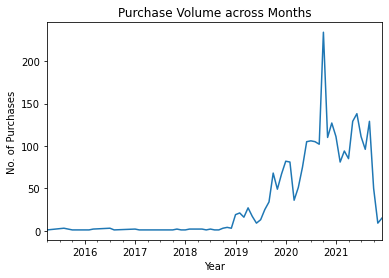

In [ ]:
purchase_df['Order Month'] = purchase_df['Order Date'].dt.to_period('M') 
s = purchase_df.drop_duplicates(subset=['Invoice ID'])['Order Month'].value_counts().sort_index()
s.plot()
plt.title('Purchase Volume across Months')
plt.xlabel('Year')
plt.ylabel('No. of Purchases')
plt.show()

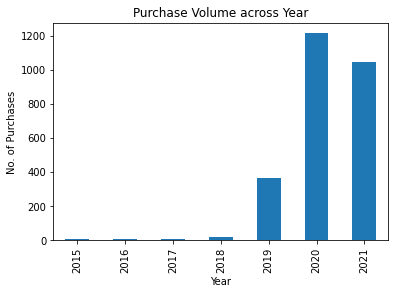

In [ ]:
purchase_df['Order Year'] = purchase_df['Order Date'].dt.to_period('Y') 
s = purchase_df.drop_duplicates(subset=['Invoice ID'])['Order Year'].value_counts().sort_index()
s.plot.bar()
plt.title('Purchase Volume across Year')
plt.xlabel('Year')
plt.ylabel('No. of Purchases')
plt.show()

### Purchase Final Price across Time

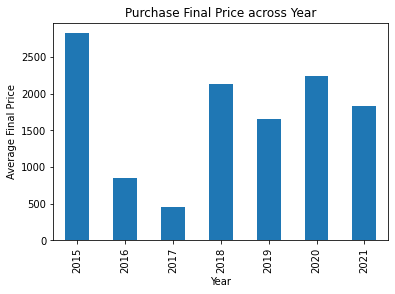

In [ ]:
s = purchase_df.groupby('Order Year').mean()['Final Price'].sort_index()
s.plot.bar()
plt.title('Purchase Final Price across Year')
plt.xlabel('Year')
plt.ylabel('Average Final Price')
plt.show()

### No. of Items Purchased in each Invoice

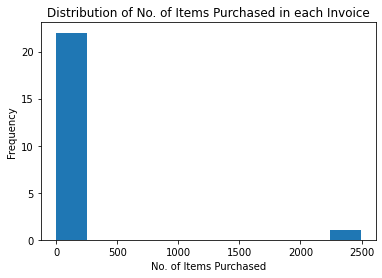

In [ ]:
s = purchase_df.groupby('Invoice ID').sum()['Quantity'].value_counts().sort_index()
s.plot.hist()
plt.title('Distribution of No. of Items Purchased in each Invoice')
plt.xlabel('No. of Items Purchased')
plt.ylabel('Frequency')
plt.show()

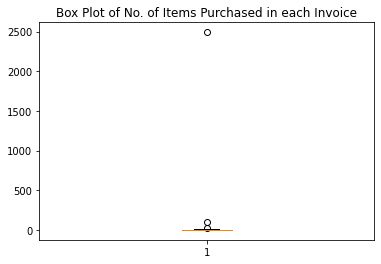

In [ ]:
plt.boxplot(s)
plt.title('Box Plot of No. of Items Purchased in each Invoice')
plt.show()

### Distribution of Final Price across Invoices

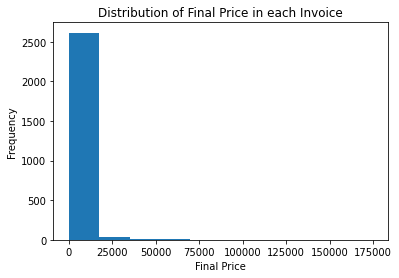

In [ ]:
s = purchase_df.drop_duplicates('Invoice ID')['Final Price']
s.plot.hist()
plt.title('Distribution of Final Price in each Invoice')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

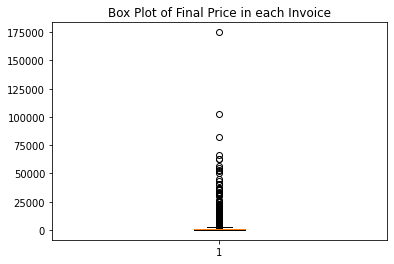

In [ ]:
plt.boxplot(s)
plt.title('Box Plot of Final Price in each Invoice')
plt.show()

### Top 10 Sub(categories) for Items Purchased
Based on the sum of all quantities

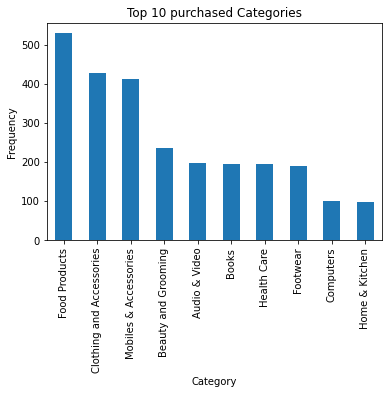

In [ ]:
s = purchase_df.groupby('Categories').sum()['Quantity']
s = s.nlargest(10)
s.plot.bar()
plt.title('Top 10 purchased Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

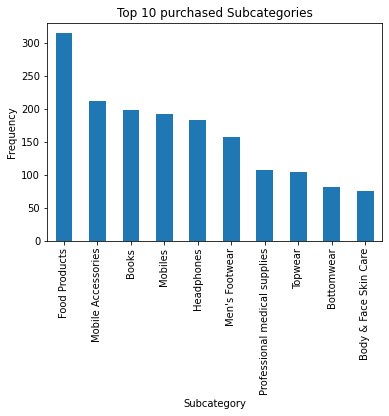

In [ ]:
s = purchase_df.groupby('Subcategories').sum()['Quantity']
s = s.nlargest(10)
s.plot.bar()
plt.title('Top 10 purchased Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Frequency')
plt.show()

### Top 10 Final Price (Sub)categories

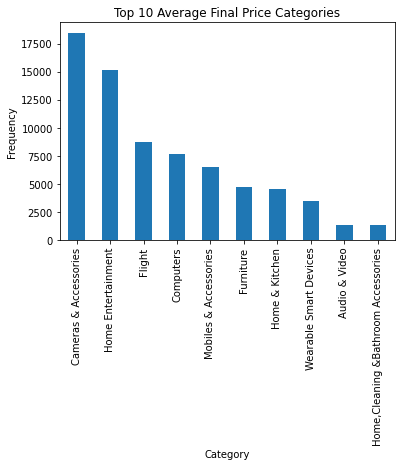

In [ ]:
s = purchase_df.groupby('Categories').mean()['Final Price']
s = s.nlargest(10)
s.plot.bar()
plt.title('Top 10 Average Final Price Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

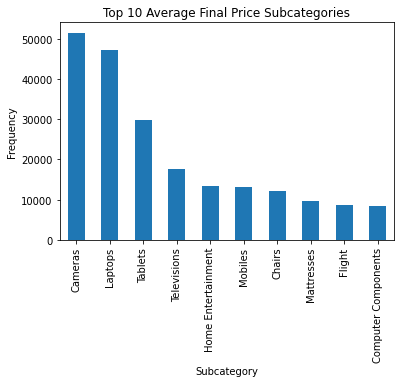

In [ ]:
s = purchase_df.groupby('Subcategories').mean()['Final Price']
s = s.nlargest(10)
s.plot.bar()
plt.title('Top 10 Average Final Price Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Frequency')
plt.show()

### Combination of Frequently-bought Categories

In [ ]:
unique_invoice_ids = purchase_df['Invoice ID'].unique()

In [ ]:
cat_combi = {}

for invoice_id in unique_invoice_ids:
  rows = purchase_df[purchase_df['Invoice ID'] == invoice_id]
  categories = rows['Categories'].unique().tolist()
  if len(categories) > 1:
    categories.sort()
    categories = str(categories)

    if categories in cat_combi.keys():
      cat_combi[categories] += 1
    else:
      cat_combi[categories] = 1

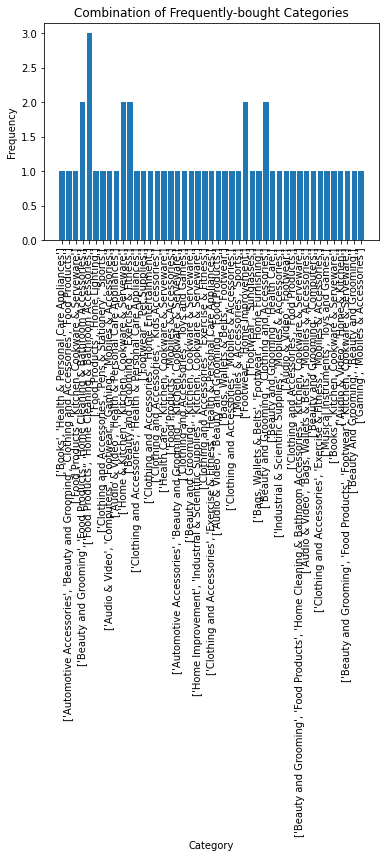

In [ ]:
plt.bar(range(len(cat_combi)), list(cat_combi.values()), align='center')
plt.xticks(range(len(cat_combi)), list(cat_combi.keys()), rotation=90)
plt.title('Combination of Frequently-bought Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot of Final Price and Quantity

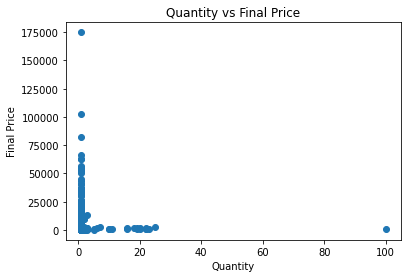

In [ ]:
plt.scatter(purchase_df['Quantity'], purchase_df['Final Price'])
plt.title("Quantity vs Final Price")
plt.xlabel('Quantity')
plt.ylabel('Final Price')
plt.show()